In [1]:
import pandas as pd
import numpy as np
from scipy import stats
#import the main libs 

In [2]:
from sklearn.datasets import load_diabetes
#import the build-in data from sklearn data set

In [3]:
raw_df =load_diabetes()

In [8]:

# get the data
data=raw_df['data']


In [9]:
#get the feature names
feature_names=raw_df['feature_names']

In [10]:
data = pd.DataFrame(data = data, columns =feature_names)
# convert this data to data frame with pandas

In [11]:

#show data
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [17]:
#get the target and make it in single colume

target=raw_df['target']
target=target.reshape(-1,1)

In [18]:

#add the target col to the data
data['target']=target
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


#### the data is quantitative

## i note that the data has an ages by negative and that logical is wrong

In [26]:
data.shape

(442, 11)

In [20]:
data.info()
# get some info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


### there is no missing data

In [21]:
data.describe()
# see the describtion of the data 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [22]:
data.head()
# see if final data set head 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [113]:
data.duplicated().sum()
# check if there is any duplication in the data

0

In [25]:
np.abs(stats.zscore(data)).sum()

age       365.147607
sex       441.112231
bmi       356.446431
bp        365.030588
s1        347.229366
s2        348.359997
s3        348.633503
s4        344.784362
s5        359.930079
s6        344.200130
target    377.477562
dtype: float64

In [115]:
corr=data.corr()
# see the corr between the features and the target

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import the visualization libs

<AxesSubplot:>

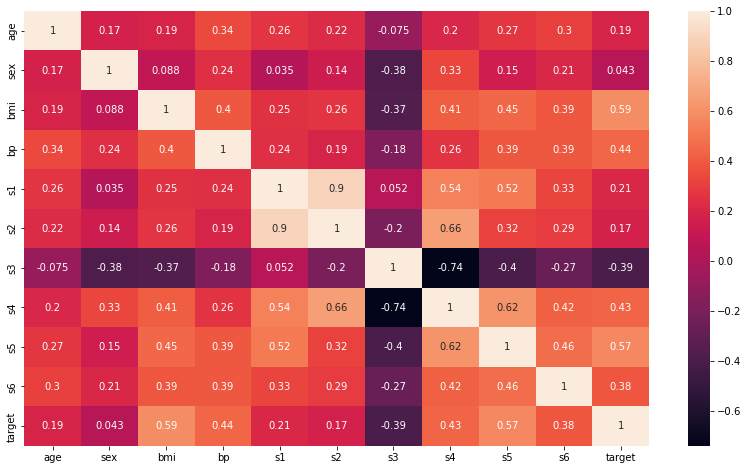

In [116]:
plt.figure(figsize=(14,8))
sns.heatmap(data=corr,annot=True)
# the corr of data

### the most feature that has corralation with the target is bmi and that what we will use at the LinearRegression

<AxesSubplot:xlabel='bmi', ylabel='count'>

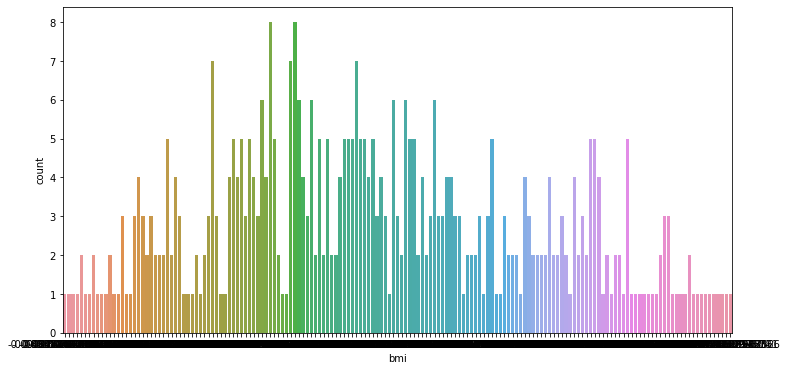

In [123]:

plt.figure(figsize=(12,6))
sns.countplot(x=data['bmi'])

## Most of the bmi repeated for 1 time and the max repeating of the bmi is 8 times

# LinearRegression

In [124]:
from sklearn.linear_model import LinearRegression
# import the linearRegression from sklearn

In [133]:
x = data[["bmi"]]
x.head()
# see the feature i choose


,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385


In [134]:
y = data[["target"]]
#pick the target

In [135]:
model= LinearRegression()
#create a model

In [136]:
model.fit(x,y)
# train it

LinearRegression()

In [137]:
model.score(x, y)
# check accurace

0.3439237602253803

In [138]:
predict=model.predict(np.array([[0.061696]]))
predict
# try to predict some values

array([[210.70984199]])

# PolynomialRegression

In [139]:
from sklearn.preprocessing import PolynomialFeatures
#import the polynomial features to help make the polynomial in the linear model

In [140]:
polymodel = PolynomialFeatures(degree=3)
# choose the degree of the ploynomial to 3  

In [141]:
xpoly = polymodel.fit_transform(x)
#transform the feaetures to 3D

In [142]:
xpoly[0]
# show the new 3 D feature

array([1.00000000e+00, 6.16962065e-02, 3.80642190e-03, 2.34841792e-04])

In [143]:
modelploy = LinearRegression()
# create new model for this process

In [149]:
modelploy.fit(xpoly, y)
## train the model 

LinearRegression()

In [145]:
modelploy.score(xpoly, y)
# check the accuracy

0.34512199713015435

In [146]:
x = data.iloc[:, :-1]
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


# LinearRegression for more than one feature

In [147]:
model= LinearRegression()
model.fit(x,y)
model.score(x, y)

0.5177494254132934

# PolynomialRegression for more than one feature

In [148]:
from sklearn.preprocessing import PolynomialFeatures
polymodel = PolynomialFeatures(degree=3)
xpoly = polymodel.fit_transform(x)
modelploy = LinearRegression()
modelploy.fit(xpoly, y)
modelploy.score(xpoly, y)

0.7985348869937765